# Project 5 - Identify Fraud from Enron Email

## Background Information

Enron Corporation was an American energy, commodities, and services company. During 2000, Fortune named Enron "America's Most Innovative Company" and the end of 2001, it became bankrupt as a result of an accounting fraud. A lot of Enron data is now in the public domain, including tens of thousands of emails and financial data of executives.

For this project we will analyze the Enron email and financial data of 146 executives at Enron. We will identify a person of interest (POI), a person who was indicted for fraud. This report will cover the following:

1. Understanding the Enron Data.
2. Feature selection.
3. Algorithm analysis
4. Validation and Evaluation

In [5]:
# %load poi_id.py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

IOError: [Errno 2] No such file or directory: 'final_project_dataset.pkl'

In [9]:
# Import libraries
import os
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import pickle
import numpy as np
import pandas as pd

from sklearn import preprocessing
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

sys.path.append("tools/")
sys.path.append("final_project/")
from feature_format import featureFormat
from feature_format import targetFeatureSplit
from tester import dump_classifier_and_data






In [8]:
# Create a feature list with first one bein POI
features_list = ['poi','salary']

#load the dataset
with open("final_project/final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Store to my_dataset for easy export below.
my_dataset = data_dict


### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

clf = None  #just for dmping not to crash

#Dumping classifier etc
dump_classifier_and_data(clf, my_dataset, features_list)

#### Data Exploration

In this section we will look at the following (from UDacity rubric)
1. total number of data points
2. allocation across classes (POI/non-POI)
3. number of features used
4. are there features with many missing values? etc.

In [17]:
print "Total Number of data points:  " + str(len(my_dataset))
print "Number of Features:  "  + str(len(my_dataset[my_dataset.keys()[0]]))

#Allocation between POI / Non POI

pois = 0
NANPois = 0

for i in my_dataset:
    if my_dataset[i]['poi'] == True:
        pois += 1
        if my_dataset[i]['total_payments'] == 'Nan':
            NANPois += 1

# NaN information

NaNTotalpayments = 0
NaNSalary = 0
NaNSal = 0
NaNEmail = 0
NaNtoMess = 0
NaNDefpay =0
NaNStockOp = 0
NaNBonus = 0
NaNRestStock = 0
NaNSharedPoi = 0
NaNRestStockDef = 0
NaNTotStock = 0
NaNExp = 0
NaNLoanAdv = 0
NaNfromMess = 0 
NaNOthers = 0
NaNFromPerstoPOI = 0
NaNDirectFees = 0
NaNDefIncome = 0
NaNLongTermIncent = 0
NaNfromPOItoPerson = 0


for i in my_dataset:
	if my_dataset[i]['total_payments'] == 'NaN':
		NaNTotalpayments += 1
	if my_dataset[i]['salary'] == 'NaN':
		NaNSalary += 1
	if my_dataset[i]['email_address'] == 'NaN':
		NaNEmail += 1
	if my_dataset[i]['to_messages'] == 'NaN':
		NaNtoMess += 1
	if my_dataset[i]['deferral_payments'] == 'NaN':
		NaNDefpay += 1
	if my_dataset[i]['exercised_stock_options'] == 'NaN':
		NaNStockOp += 1
	if my_dataset[i]['bonus'] == 'NaN':
		NaNBonus += 1
	if my_dataset[i]['restricted_stock'] == 'NaN':
		NaNRestStock += 1
	if my_dataset[i]['shared_receipt_with_poi'] == 'NaN':
		NaNSharedPoi += 1
	if my_dataset[i]['restricted_stock_deferred'] == 'NaN':
		NaNRestStockDef += 1
	if my_dataset[i]['total_stock_value'] == 'NaN':
		NaNTotStock += 1
	if my_dataset[i]['expenses'] == 'NaN':
		NaNExp += 1
        
	if my_dataset[i]['loan_advances'] == 'NaN':
		NaNLoanAdv += 1
	if my_dataset[i]['from_messages'] == 'NaN':
		NaNfromMess += 1
	if my_dataset[i]['other'] == 'NaN':
		NaNOthers += 1
	if my_dataset[i]['from_this_person_to_poi'] == 'NaN':
		NaNFromPerstoPOI += 1
	if my_dataset[i]['director_fees'] == 'NaN':
		NaNDirectFees += 1
	if my_dataset[i]['deferred_income'] == 'NaN':
		NaNDefIncome += 1
	if my_dataset[i]['long_term_incentive'] == 'NaN':
		NaNLongTermIncent += 1
	if my_dataset[i]['from_poi_to_this_person'] == 'NaN':
		NaNfromPOItoPerson += 1

        
print "Number of POIS: " + str(pois)
print "Number of NON-POIS: "+ str(len(my_dataset) - pois)
print "Percentage of POIS: " + str((float(pois)/len(my_dataset) *100)) + "%"
print "Number of POIS with NAN Total Payments: " + str(NANPois)
print "Number of NAN Email: " + str(NaNEmail)
print "Number of NAN Total Payments: " + str(NaNTotalpayments)
print "Number of NAN Salary: " + str(NaNSalary)
print "Number of NAN to messages: " + str(NaNtoMess)
print "Number of NAN Deferred payments: " + str(NaNDefpay)
print "Number of NAN Exercised Stock Options: " + str(NaNStockOp)
print "Number of NAN bonus: " + str(NaNBonus)
print "Number of NAN restricted stocks: " + str(NaNRestStock)
print "Number of NAN shared receipt with poi: " + str(NaNSharedPoi)
print "Number of NAN restricted stock deferred: " + str(NaNRestStockDef)
print "Number of NAN total stock value: " + str(NaNTotStock)
print "Number of NAN expenses: " + str(NaNExp)
print "Number of NAN loan advances: " + str(NaNLoanAdv)
print "Number of NAN from messages: " + str(NaNfromMess)
print "Number of NAN other: " + str(NaNOthers)
print "Number of NAN from this person to poi: " + str(NaNFromPerstoPOI)
print "Number of NAN director fees: " + str(NaNDirectFees)
print "Number of NAN deferred income: " + str(NaNDefIncome)
print "Number of NAN long term incenties: " + str(NaNLongTermIncent)
print "Number of NAN from poi to this person: " + str(NaNfromPOItoPerson)


Total Number of data points:  146
Number of Features:  21
Number of POIS: 18
Number of NON-POIS: 128
Percentage of POIS: 12.3287671233%
Number of POIS with NAN Total Payments: 0
Number of NAN Email: 35
Number of NAN Total Payments: 21
Number of NAN Salary: 51
Number of NAN to messages: 60
Number of NAN Deferred payments: 107
Number of NAN Exercised Stock Options: 44
Number of NAN bonus: 64
Number of NAN restricted stocks: 36
Number of NAN shared receipt with poi: 60
Number of NAN restricted stock deferred: 128
Number of NAN total stock value: 20
Number of NAN expenses: 51
Number of NAN loan advances: 142
Number of NAN from messages: 60
Number of NAN other: 53
Number of NAN from this person to poi: 60
Number of NAN director fees: 129
Number of NAN deferred income: 97
Number of NAN long term incenties: 80
Number of NAN from poi to this person: 60


### Outliers

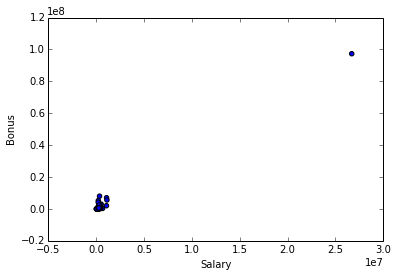

In [19]:
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter(salary, bonus)

plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.show()

